In [30]:
from rdkit import Chem
import matplotlib.pyplot as plt
import pandas as pd
import gzip
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
import seaborn as sb
% matplotlib inline

UsageError: Line magic function `%` not found.


In [6]:
supp = Chem.SDMolSupplier('../data/drugbank.sdf')
drug_bank = [[mol, 'DrugBank'] for mol in supp if mol]

with gzip.open('actives_final.sdf.gz') as sdf:
    supp_actives = Chem.ForwardSDMolSupplier(sdf)
    actives = [[mol, 'actives'] for mol in supp_actives if mol]

with gzip.open('decoys_final.sdf.gz') as sdf:
    supp_decoys = Chem.ForwardSDMolSupplier(sdf)
    decoys = [[mol, 'decoys'] for mol in supp_decoys if mol]

[12:38:45] ERROR: moving to the beginning of the next molecule
[12:41:41] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:38:45] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [12:41:41] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:41:41] ERROR: Could not sanitize molecule ending on line 20009
[12:41:41] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [12:41:41] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:41:41] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:41:41] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10

RDKit ERROR: [12:41:41] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:41:41] ERROR: Could not sanitize molecule ending on line 250947
[12:41:41] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [12:41:41] ERROR: Can't kekulize mol.  Unkekulized a

In [7]:
df_db = pd.DataFrame(drug_bank, columns=['Mol', 'Source'])
df_ac = pd.DataFrame(actives, columns=['Mol', 'Source'])
df_de = pd.DataFrame(decoys, columns=['Mol', 'Source'])

df = pd.concat((df_db, df_ac, df_de), ignore_index=True)
df

,Mol,Source
0,"<img data-content=""rdkit/molecule"" src=""data:i...",DrugBank
1,"<img data-content=""rdkit/molecule"" src=""data:i...",DrugBank
2,"<img data-content=""rdkit/molecule"" src=""data:i...",DrugBank
3,"<img data-content=""rdkit/molecule"" src=""data:i...",DrugBank
4,"<img data-content=""rdkit/molecule"" src=""data:i...",DrugBank
...,...,...
36236,"<img data-content=""rdkit/molecule"" src=""data:i...",decoys
36237,"<img data-content=""rdkit/molecule"" src=""data:i...",decoys
36238,"<img data-content=""rdkit/molecule"" src=""data:i...",decoys
36239,"<img data-content=""rdkit/molecule"" src=""data:i...",decoys


In [14]:
df['MW'] = df['Mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['rings'] = df['Mol'].apply(lambda x: Chem.GetSSSR(x))
df['HBA'] = df['Mol'].apply(lambda x: Lipinski.NumHAcceptors(x))
df['HBD'] = df['Mol'].apply(lambda x: Lipinski.NumHDonors(x))
df['logP'] = df['Mol'].apply(lambda x: Descriptors.MolLogP(x))
df['TPSA'] = df['Mol'].apply(lambda x: Descriptors.TPSA(x))
df['RB'] = df['Mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))
df

,Mol,Source,MW,rings,HBA,HBD,logP,TPSA,RB
0,"<img data-content=""rdkit/molecule"" src=""data:i...",DrugBank,2178.985813,6,29,28,-8.11643,901.57,66
1,"<img data-content=""rdkit/molecule"" src=""data:i...",DrugBank,1268.641439,6,16,17,-3.10570,495.89,31
2,"<img data-content=""rdkit/molecule"" src=""data:i...",DrugBank,1068.426955,4,15,14,-4.13203,435.41,19
3,"<img data-content=""rdkit/molecule"" src=""data:i...",DrugBank,1429.669818,6,16,17,-0.50613,495.67,38
4,"<img data-content=""rdkit/molecule"" src=""data:i...",DrugBank,1201.841368,1,12,5,3.26900,278.80,15
...,...,...,...,...,...,...,...,...,...
36236,"<img data-content=""rdkit/molecule"" src=""data:i...",decoys,403.135448,5,6,2,4.86430,67.15,3
36237,"<img data-content=""rdkit/molecule"" src=""data:i...",decoys,403.135448,5,5,2,4.45200,66.89,3
36238,"<img data-content=""rdkit/molecule"" src=""data:i...",decoys,391.108754,5,4,2,4.38350,66.89,2
36239,"<img data-content=""rdkit/molecule"" src=""data:i...",decoys,391.146283,3,3,1,4.45892,44.81,3


<AxesSubplot:title={'center':'rings'}, xlabel='Source'>

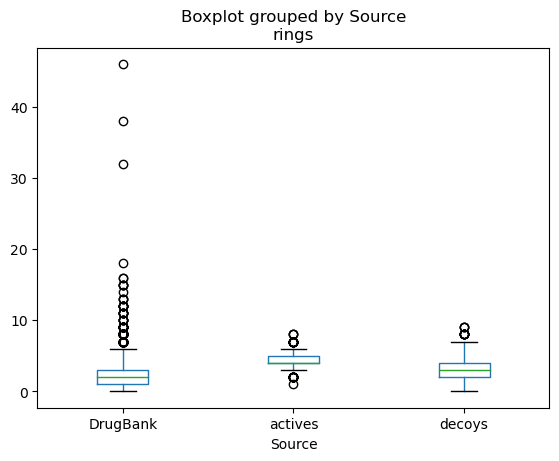

In [29]:
df.boxplot(by ='Source', column =['rings'], grid=False)

<AxesSubplot:xlabel='Source', ylabel='MW'>

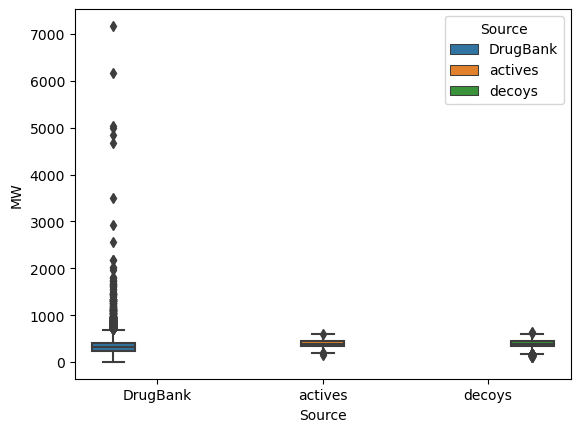

In [35]:
sb.boxplot(x='Source', y='MW', hue='Source', data=df)

In [39]:
melted = pd.melt(df[['Source', 'rings']])
melted

,variable,value
0,Source,DrugBank
1,Source,DrugBank
2,Source,DrugBank
3,Source,DrugBank
4,Source,DrugBank
...,...,...
72477,rings,5
72478,rings,5
72479,rings,5
72480,rings,3


boxploty, violin ploty, correlation of descriptors, heatmap